In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="darkgrid")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
79680,58126.0,1.113650,-0.233325,0.478433,0.628400,-0.389931,0.310201,-0.368809,0.287030,0.506713,...,-0.243549,-0.657439,0.050648,-0.317370,0.220480,0.215309,-0.016968,0.001221,29.99,0
49733,44185.0,-0.375920,1.160838,1.288081,0.000896,0.295910,-0.492318,0.691852,0.014342,-0.534755,...,-0.227574,-0.500515,-0.002502,0.047753,-0.204185,0.098621,0.269007,0.096535,0.99,0
152461,97379.0,2.078796,-0.106522,-1.162330,0.338666,0.205329,-0.450434,-0.087735,-0.302795,2.330178,...,-0.083288,0.339947,0.050008,0.595351,0.247286,0.130229,-0.053345,-0.062608,3.30,0
239764,150259.0,2.207422,-1.606205,0.156107,-1.387412,-2.070926,-0.479895,-1.742563,-0.053509,-0.654513,...,-0.129467,0.201166,0.331546,0.034482,-0.531909,-0.251505,0.068917,-0.026098,26.00,0
71138,54175.0,0.817135,-2.201222,0.779840,-1.123952,-2.374996,-0.405841,-1.101712,-0.003851,-1.735021,...,0.090925,-0.122978,-0.164727,0.508008,-0.023591,-0.297312,-0.003803,0.079369,327.60,0


In [17]:
def show_description(X, y):
    print(f'''
  Features shape : {X.shape}
    Labels shape : {y.shape}
--------------------------
Labels > Class 0 : {y[y==0].count()}
Labels > Class 1 : {y[y==1].count()}
    ''')
    
    
    
X = data.drop(columns=['Class'])
y = data['Class']

show_description(X, y)


  Features shape : (284807, 30)
    Labels shape : (284807,)
--------------------------
Labels > Class 0 : 284315
Labels > Class 1 : 492
    


# EDA

In [4]:
print('NaN Values in our dataset:', data.isnull().sum().sum())

NaN Values in our dataset: 0


Text(0.5, 1.0, 'Transaction Class Distribution')

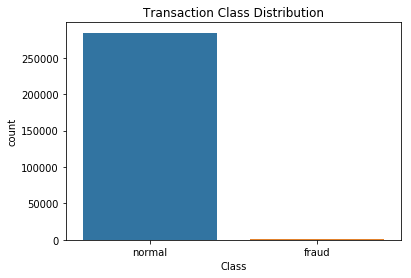

In [6]:
sns.countplot(np.where(y==0, 'normal', 'fraud'))
plt.xlabel('Class')
plt.title('Transaction Class Distribution')

This is a perfect example of an Imbalanced Dataset.
Now, we'll perform:
* **under-sampling**
* **over-sampling**

## Under-Sampling


  Features shape : (984, 30)
    Labels shape : (984,)
--------------------------
Labels > Class 0 : 492
Labels > Class 1 : 492
    


Text(0.5, 1.0, 'Transaction Class Distribution')

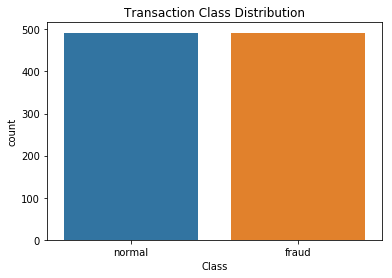

In [28]:
from imblearn.under_sampling import NearMiss

ne = NearMiss()
X_us, y_us = ne.fit_sample(X, y)

show_description(X_us, y_us)

sns.countplot(np.where(y_us==0, 'normal', 'fraud'))
plt.xlabel('Class')
plt.title('Transaction Class Distribution')

## Over-Sampling


  Features shape : (567550, 30)
    Labels shape : (567550,)
--------------------------
Labels > Class 0 : 283775
Labels > Class 1 : 283775
    


Text(0.5, 1.0, 'Transaction Class Distribution')

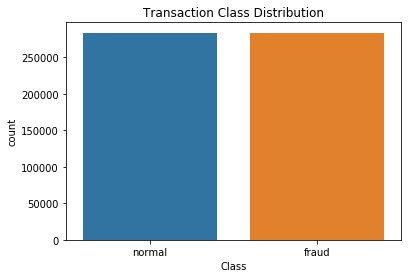

In [24]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()

X_os, y_os = smk.fit_sample(X, y)

show_description(X_os, y_os)

sns.countplot(np.where(y_os==0, 'normal', 'fraud'))
plt.xlabel('Class')
plt.title('Transaction Class Distribution')

# Testing

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test             = train_test_split(X, y, test_size=0.2)
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(X_us, y_us, test_size=0.2)
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(X_os, y_os, test_size=0.2)

In [46]:
from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# original_pred = rf_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_us_train, y_us_train)
us_pred = rf_model.predict(X_us_test)

# rf_model = RandomForestClassifier()
# rf_model.fit(X_os_train, y_os_train)
# os_pred = rf_model.predict(X_os_test)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_us_test, us_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets